In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1

In [9]:
df = pd.read_csv('test_data.csv', header=None, names=['A','B','C'])
df.head()

,A,B,C
0,0.723602,0.717391,1.321958
1,0.695976,0.743628,1.300610
2,0.960247,0.812411,1.919370
3,0.204493,0.640547,0.685385
4,0.205220,0.261050,0.305429


<IPython.core.display.Javascript object>


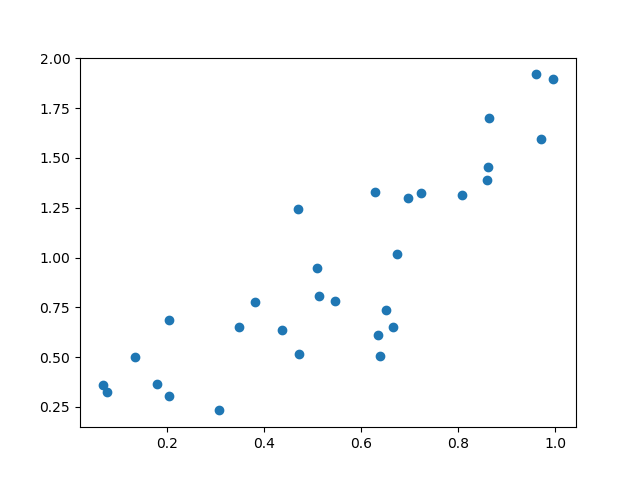

In [34]:
x = df['A'].values.reshape(-1,1)
y = df['C'].values.reshape(-1,1)
fig, ax = plt.subplots()
_ = ax.plot(x, y, 'o')

<IPython.core.display.Javascript object>


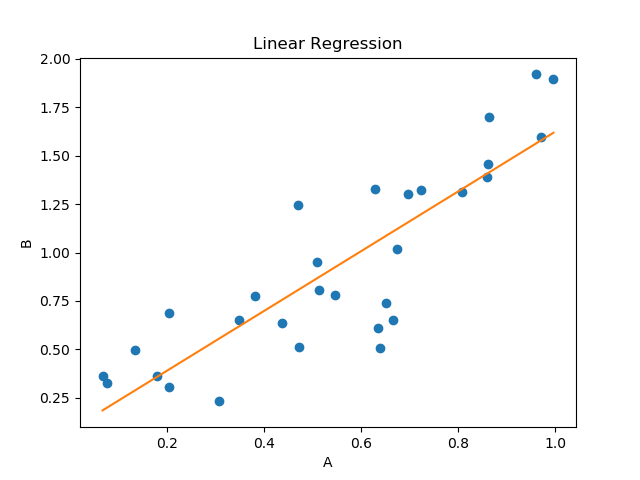

In [35]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x, y)
x_new = np.linspace(x.min(), x.max()).reshape(-1,1)
y_hat = linreg.predict(x_new)

fig, ax = plt.subplots()
_ = ax.plot(x, y, 'o')
_ = ax.plot(x_new, y_hat, '-')
_ = ax.set(xlabel='A', ylabel='B', title='Linear Regression')

<IPython.core.display.Javascript object>


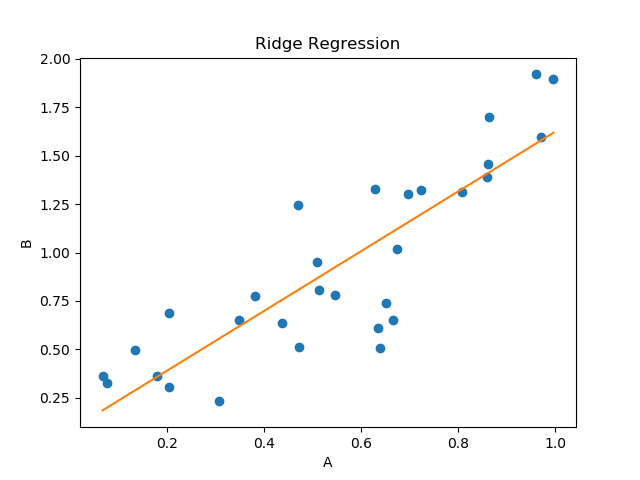

In [36]:
from sklearn.linear_model import Ridge
ridge = LinearRegression()
ridge.fit(x, y)
x_new = np.linspace(x.min(), x.max()).reshape(-1,1)
y_hat = ridge.predict(x_new)

fig, ax = plt.subplots()
_ = ax.plot(x, y, 'o')
_ = ax.plot(x_new, y_hat, '-')
_ = ax.set(xlabel='A', ylabel='B', title='Ridge Regression')

## Part 2

<IPython.core.display.Javascript object>


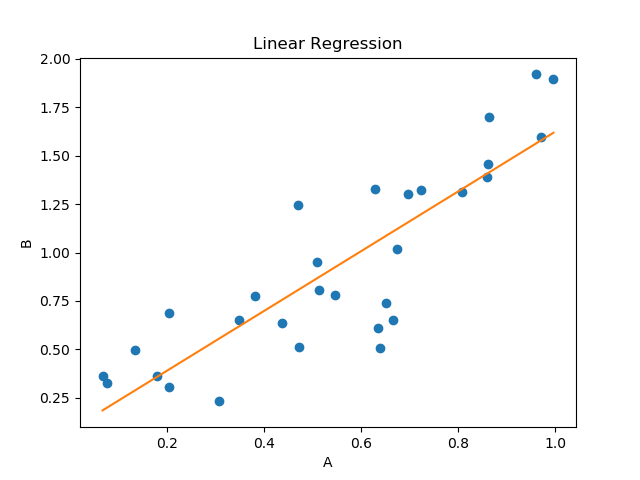

In [37]:
linreg = LinearRegression()
linreg.fit(x, y)
x_new = np.linspace(x.min(), x.max()).reshape(-1,1)
y_hat = linreg.predict(x_new)

fig, ax = plt.subplots()
_ = ax.plot(x, y, 'o')
_ = ax.plot(x_new, y_hat, '-')
_ = ax.set(xlabel='A', ylabel='B', title='Linear Regression')

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x)
quad_reg = LinearRegression()
quad_reg.fit(x_poly, y)
x_new_poly = poly.fit_transform(x_new)
y_hat = quad_reg.predict(x_new_poly)

<IPython.core.display.Javascript object>


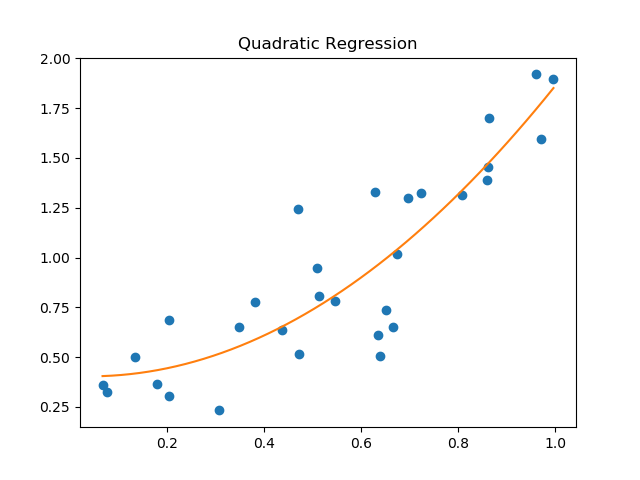

In [46]:
fig, ax = plt.subplots()
_ = ax.plot(x, y, 'o')
_ = ax.plot(x_new, y_hat, '-')
_ = ax.set_title('Quadratic Regression')

In [60]:
def loss_linear(x, y):
    return np.sqrt(((linreg.predict(x) - y)**2).sum())

def loss_quad(x, y):
    xp = poly.transform(x)
    return np.sqrt(((quad_reg.predict(xp) - y)**2).sum())

print('linear model: {:.6f}'.format(loss_linear(x, y)))
print('quadratic model: {:.6f}'.format(loss_quad(x, y)))

linear model: 1.375389
quadratic model: 1.221495
